In [2]:
import seaborn as sns
import pandas as pd
import configparser
import matplotlib.pyplot as plt
import ast
import numpy as np

In [3]:
data = pd.read_csv("../results/experiment2_stability_final.csv")

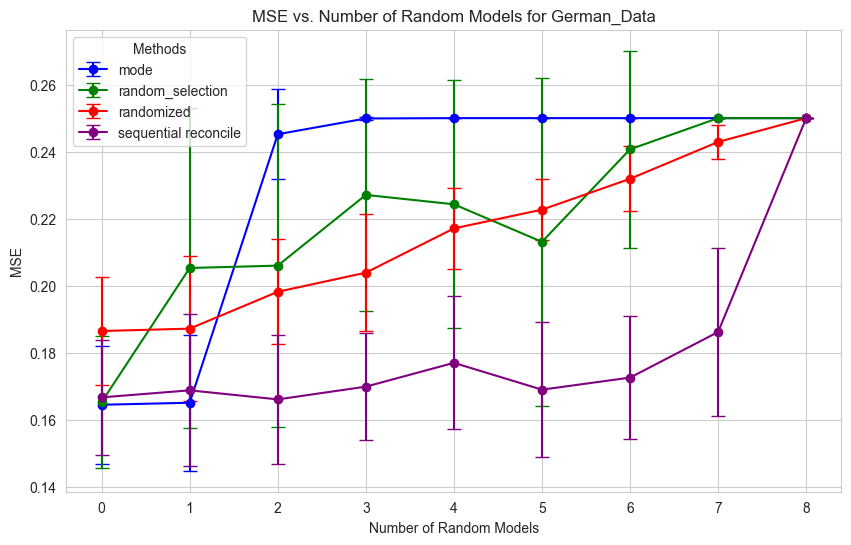

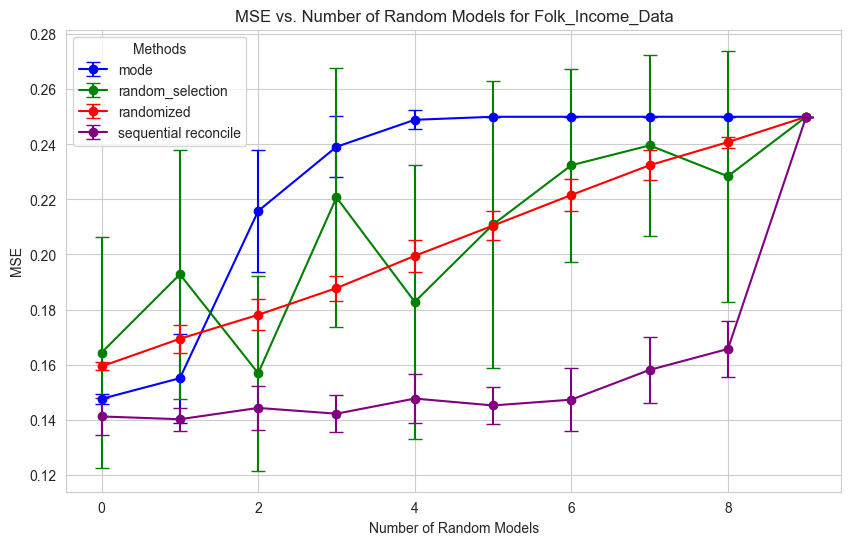

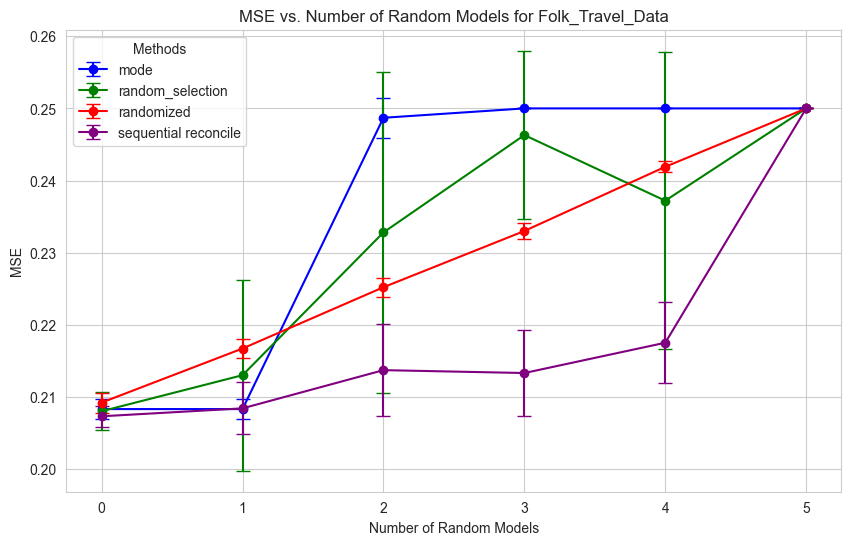

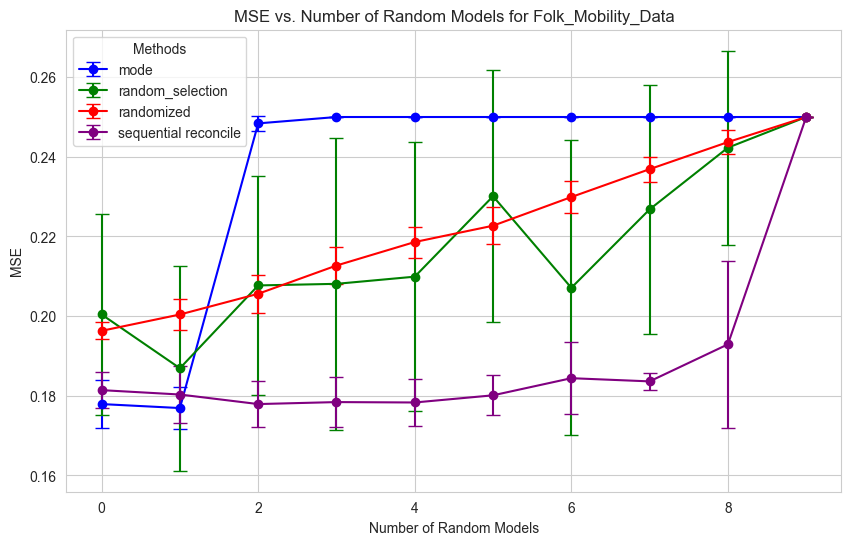

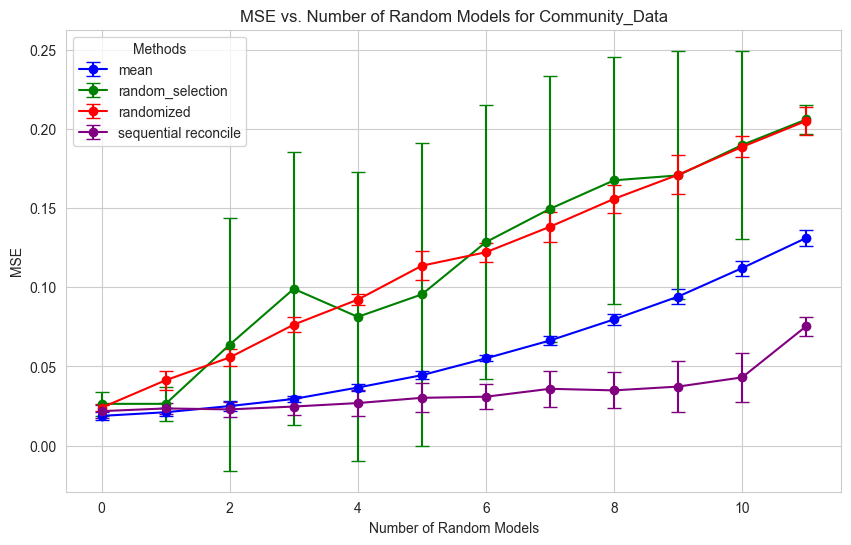

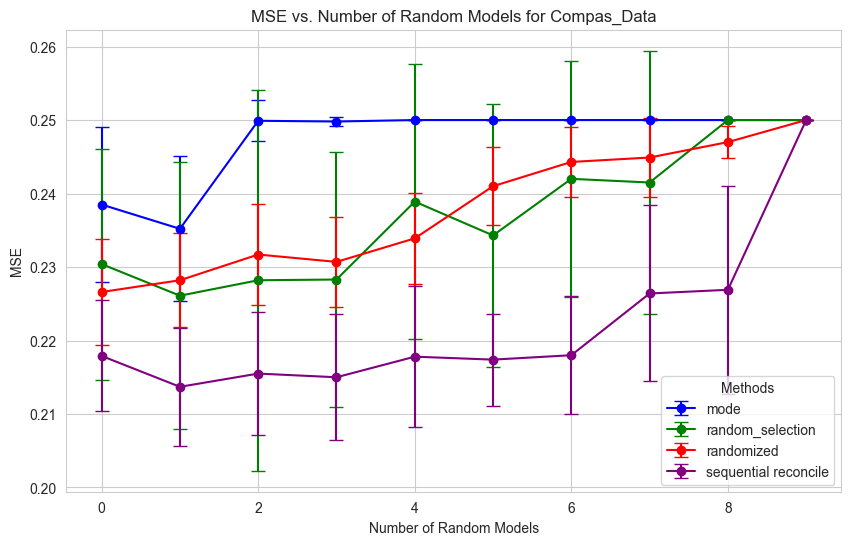

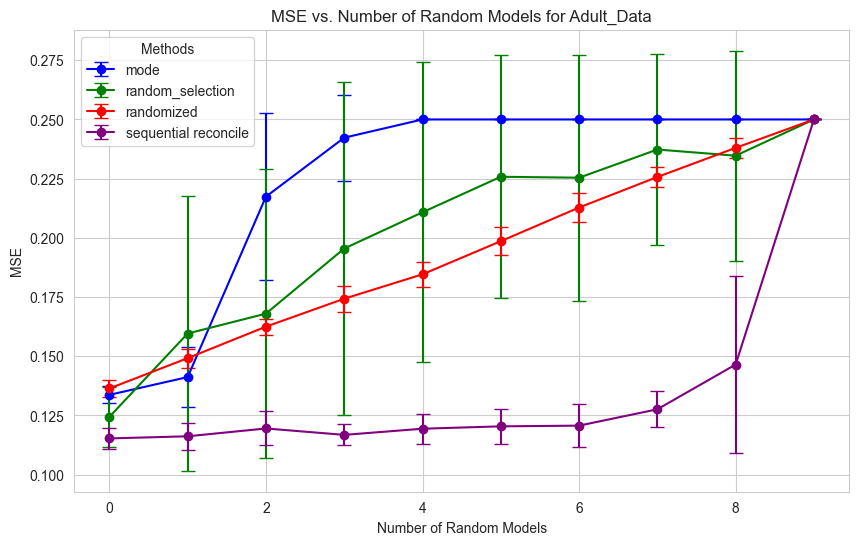

In [3]:
datasets = data['Data'].unique()
data['MSE'] = pd.to_numeric(data['MSE'], errors='coerce')

# Create separate plots for each dataset
# for dataset in datasets:
# Filter data for the current dataset
for dataset in datasets:
    # Filter data for the current dataset
    dataset_df = data[data['Data'] == dataset]
    
    # Group by Method and number of random models, and calculate mean and std
    grouped = dataset_df.groupby(['Method', 'number of random models'])
    mean_mse = grouped['MSE'].mean().reset_index(name='mean_mse')
    std_mse = grouped['MSE'].std().reset_index(name='std_mse')

    # Merge mean and std into a single DataFrame
    plot_data = pd.merge(mean_mse, std_mse, on=['Method', 'number of random models'])

    # Plot the data
    plt.figure(figsize=(10, 6))
    methods = plot_data['Method'].unique()
    colors = ['blue', 'green', 'red', 'purple']

    for i, method in enumerate(methods):
        method_data = plot_data[plot_data['Method'] == method]
        plt.errorbar(
            method_data['number of random models'],  # X-axis
            method_data['mean_mse'],  # Y-axis (mean MSE)
            yerr=method_data['std_mse'],  # Error bars (std MSE)
            fmt='-o', label=method, color=colors[i], capsize=5
        )

    # Customize the plot
    plt.title(f'MSE vs. Number of Random Models for {dataset}')
    plt.xlabel('Number of Random Models')
    plt.ylabel('MSE')
    plt.legend(title='Methods')
    plt.grid(True)

    # Show the plot
    plt.show()

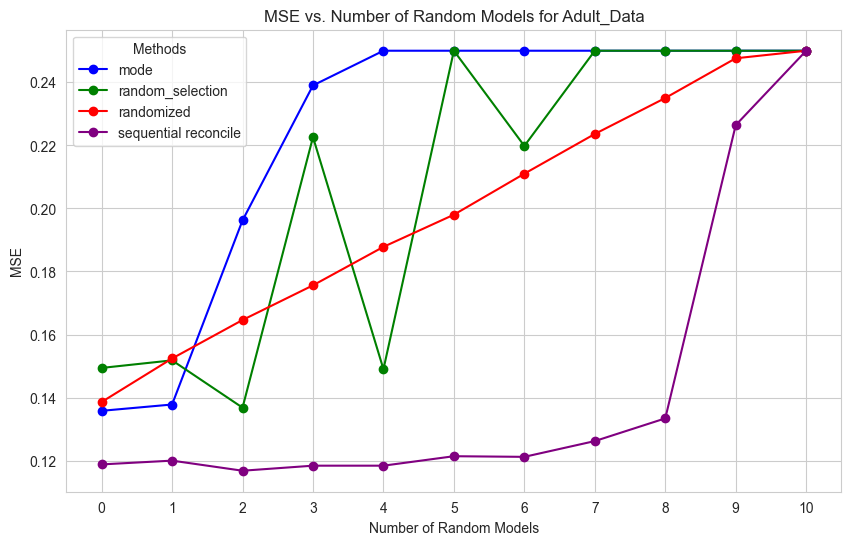

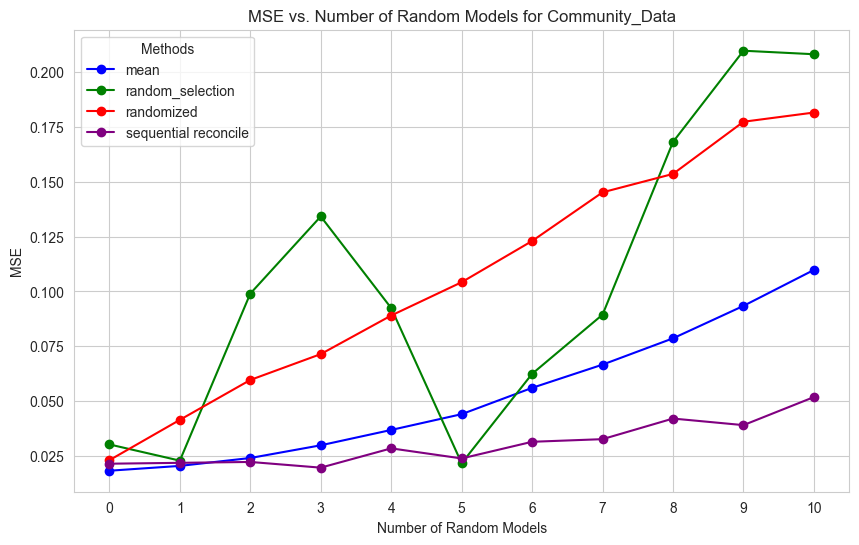

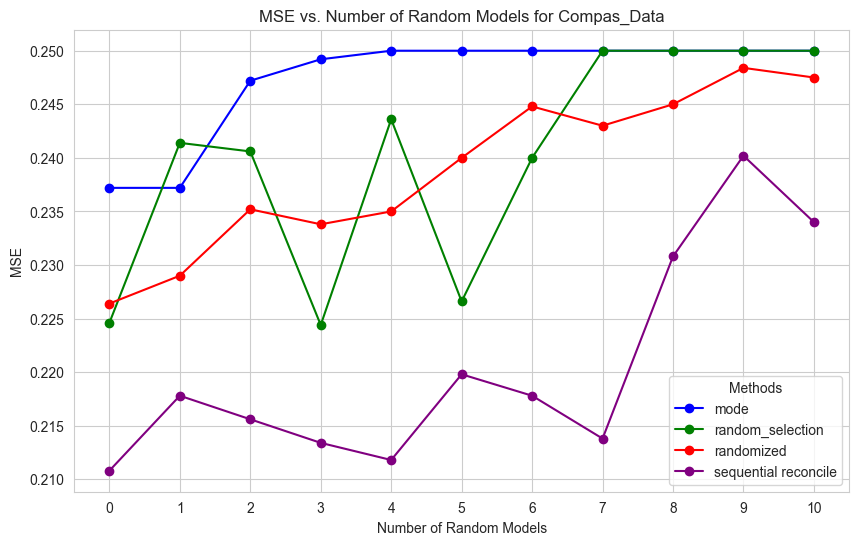

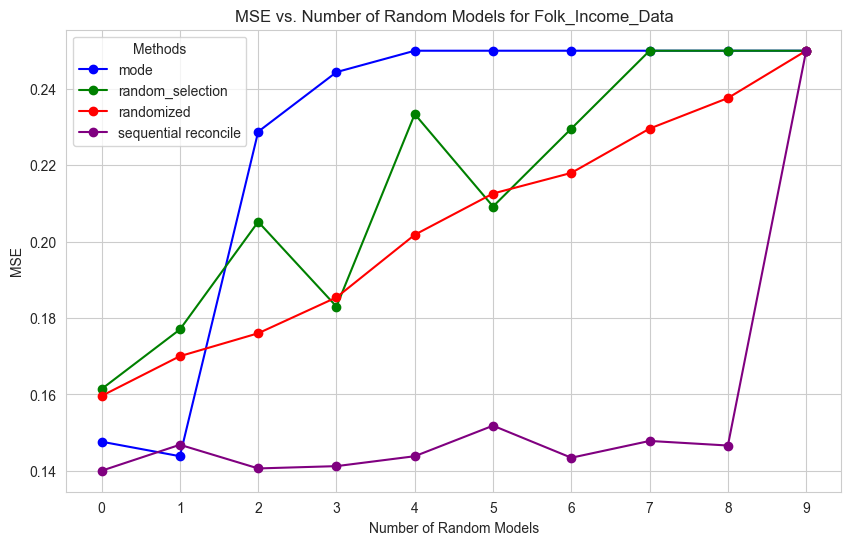

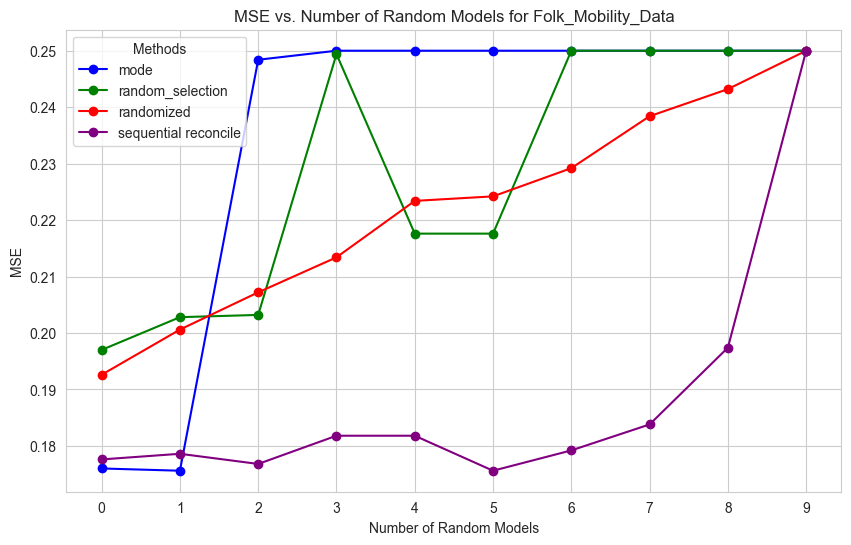

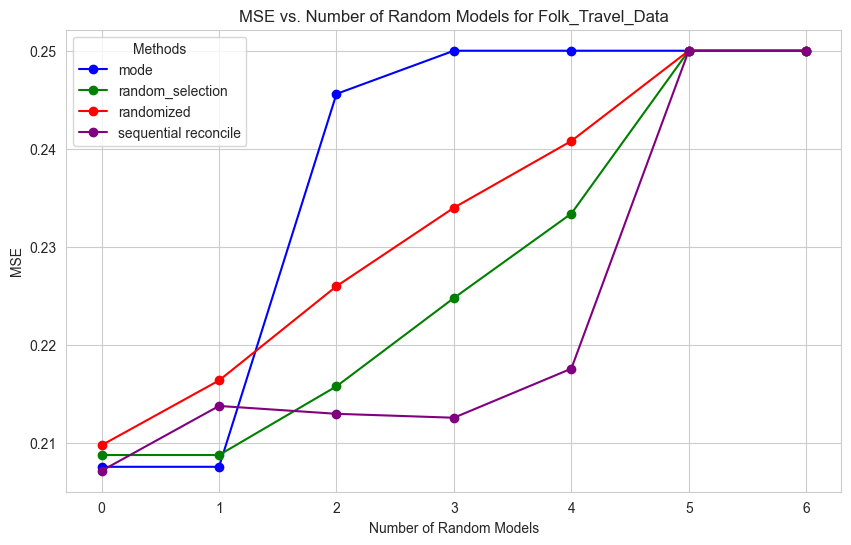

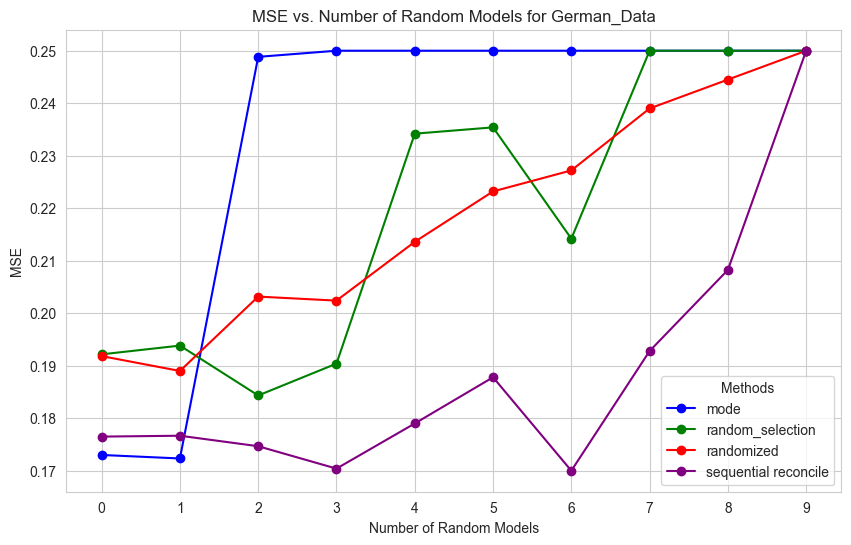

In [21]:
for dataset in datasets:
    # Filter data for the current dataset
    dataset_df = data[data['Data'] == dataset]
    grouped = dataset_df.groupby(['Method', 'number of random models'])
    mean_mse = grouped['MSE'].mean().reset_index(name='mean_mse')

    # Step 3: Prepare x-axis range
    x_values = dataset_df['number of random models'].unique()
    x_values.sort()
    
    # Step 4: Plot the data
    plt.figure(figsize=(10, 6))
    methods = mean_mse['Method'].unique()
    colors = ['blue', 'green', 'red', 'purple']
    
    for i, method in enumerate(methods):
        method_data = mean_mse[mean_mse['Method'] == method]
        plt.plot(
            method_data['number of random models'],  # X-axis
            method_data['mean_mse'],  # Y-axis (mean MSE)
            '-o', label=method, color=colors[i]
        )
    
    # Customize the plot
    plt.title(f'MSE vs. Number of Random Models for {dataset}')
    plt.xlabel('Number of Random Models')
    plt.ylabel('MSE')
    plt.xticks(x_values)  # Ensure all x values are labeled
    plt.legend(title='Methods')
    plt.grid(True)
    
    # Show the plot
    plt.show()

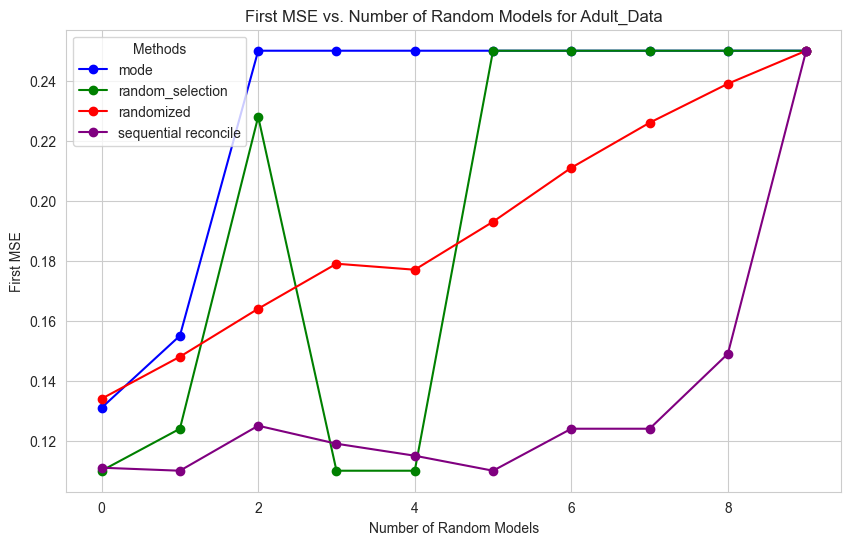

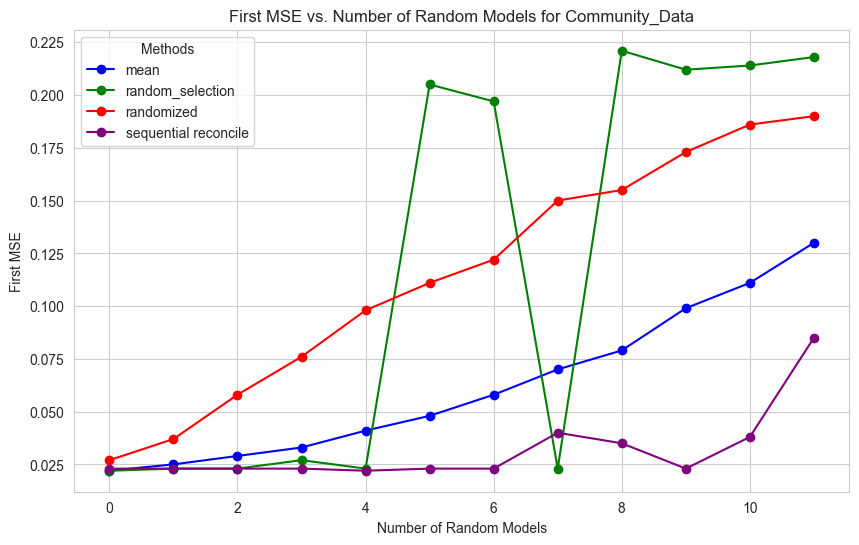

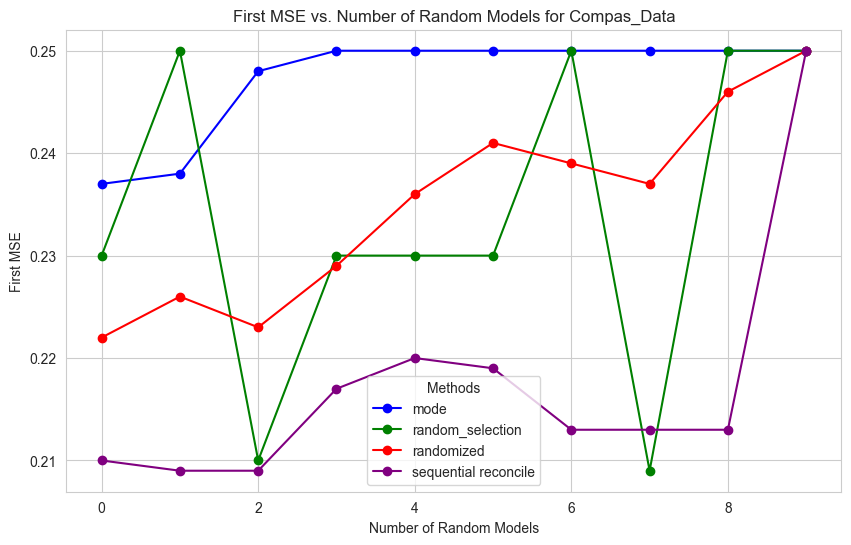

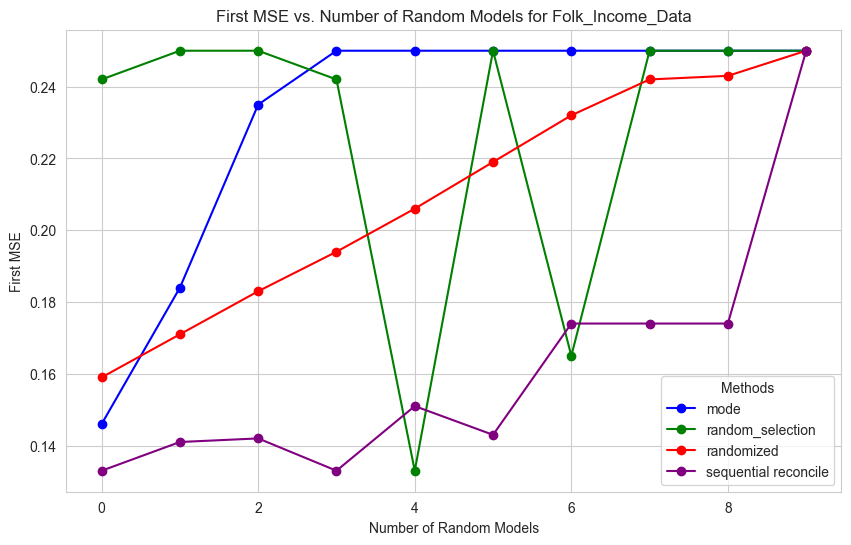

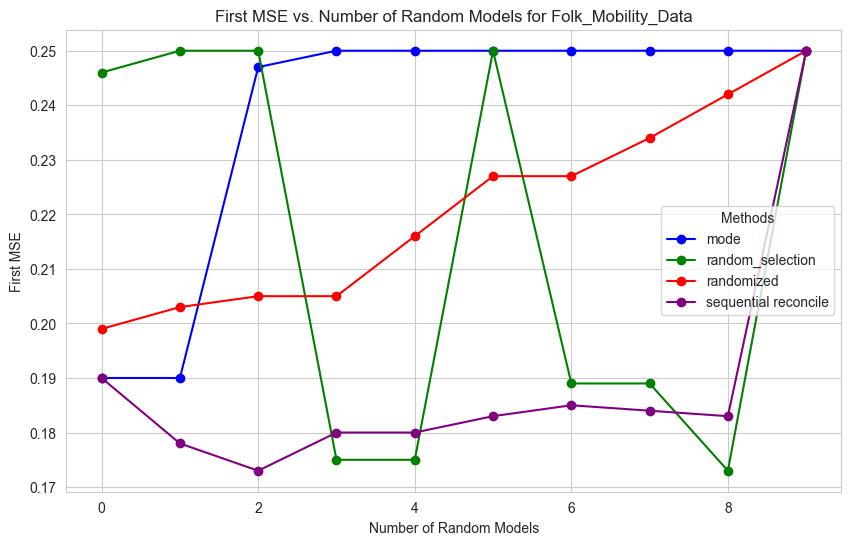

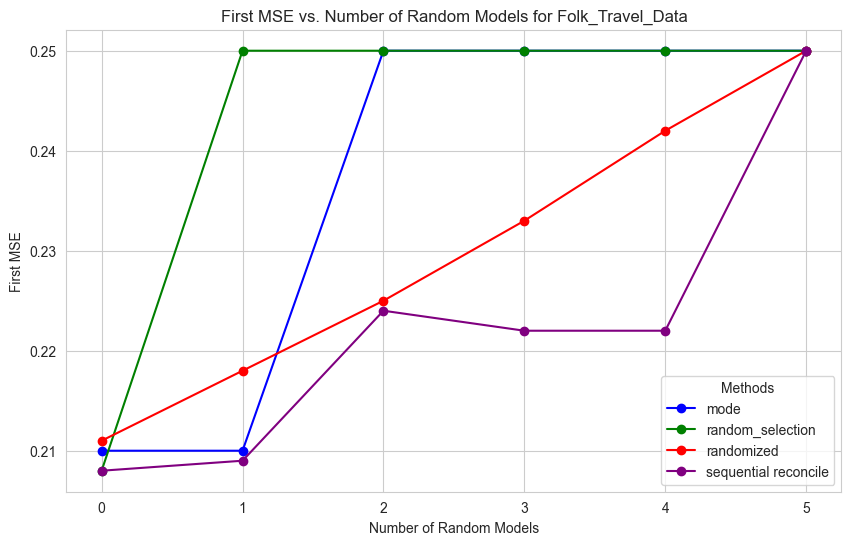

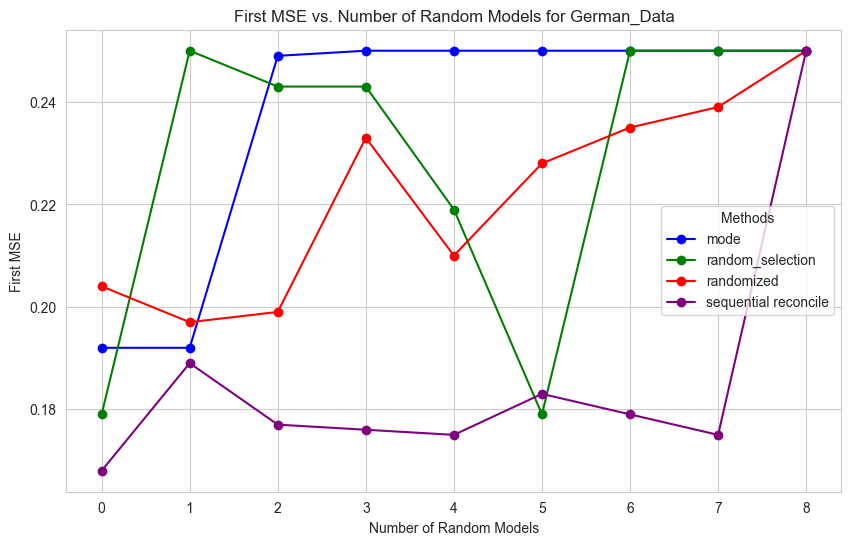

In [4]:
filtered_df = (
    data.groupby(['Data', 'Method', 'number of random models'])
    .first()
    .reset_index()
)

# Step 2: Plot the data for one dataset at a time
datasets = filtered_df['Data'].unique()

for dataset in datasets:
    dataset_df = filtered_df[filtered_df['Data'] == dataset]
    
    plt.figure(figsize=(10, 6))
    methods = dataset_df['Method'].unique()
    colors = ['blue', 'green', 'red', 'purple']

    for i, method in enumerate(methods):
        method_data = dataset_df[dataset_df['Method'] == method]
        plt.plot(
            method_data['number of random models'],  # X-axis
            method_data['MSE'],  # Y-axis
            '-o', label=method, color=colors[i]
        )

    # Customize the plot
    plt.title(f'First MSE vs. Number of Random Models for {dataset}')
    plt.xlabel('Number of Random Models')
    plt.ylabel('First MSE')
    plt.legend(title='Methods')
    plt.grid(True)

    # Show the plot
    plt.show()

/var/folders/v_/d3hz__gx7y9ffy_rls7zbjpm0000gn/T/ipykernel_5744/1507619629.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Experiment'] = (
/var/folders/v_/d3hz__gx7y9ffy_rls7zbjpm0000gn/T/ipykernel_5744/1507619629.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Data'] = filtered_df['Data'].str.replace('_Data', '', regex=False)


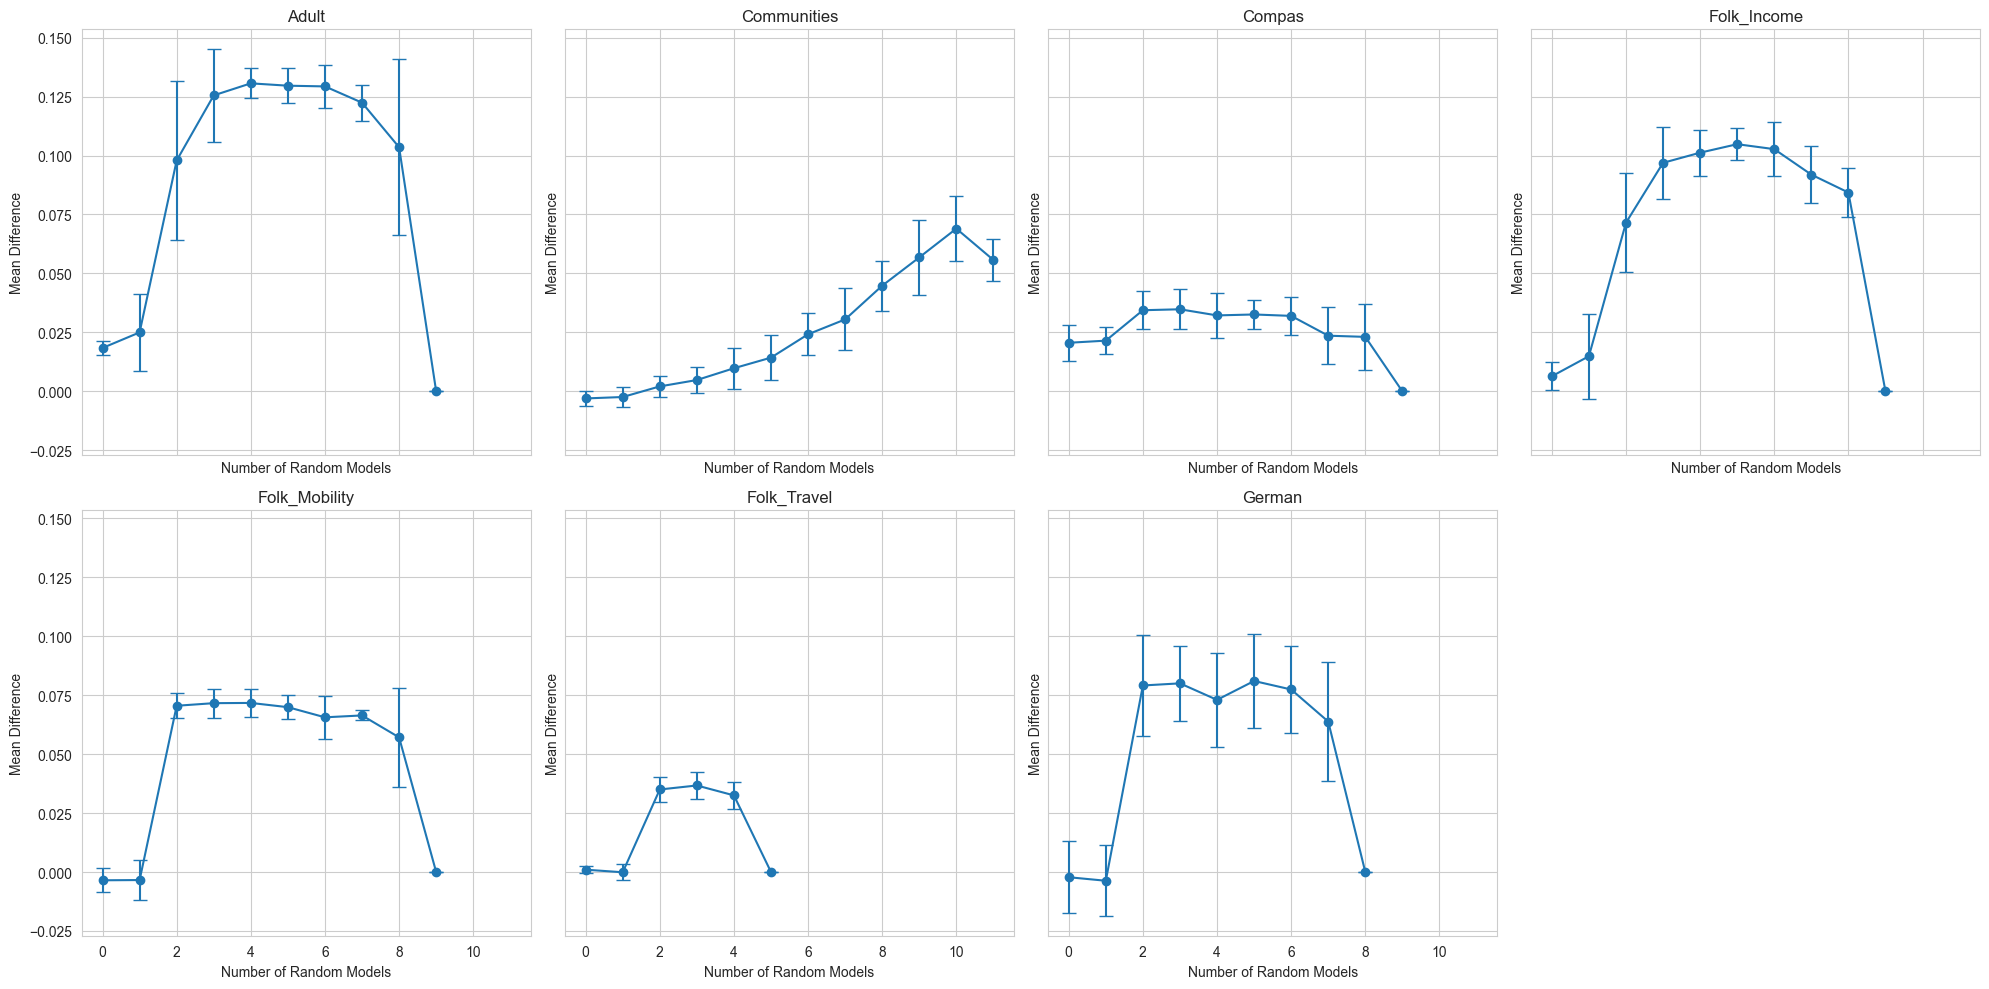

In [8]:
method_1 = 'mode'
method_2 = 'sequential reconcile'
data.loc[data['Method'] == 'mean', 'Method'] = 'mode'
# import pylustrator  
# pylustrator.start()  
# method_3 = 'mean'
filtered_df = data[data['Method'].isin([method_1, method_2])]
filtered_df['Experiment'] = (
    filtered_df.groupby(['Data', 'number of random models', 'Method']).cumcount() + 1
)
filtered_df['Data'] = filtered_df['Data'].str.replace('_Data', '', regex=False)
# Step 2: Calculate the difference between the two methods
# Pivot the DataFrame for easier comparison
pivot_df = filtered_df.pivot_table(
    index=['Data', 'number of random models', 'Experiment'],
    columns='Method',
    values='MSE'
).reset_index()

# Calculate the difference and drop unnecessary columns
pivot_df['Difference'] = pivot_df[method_1] - pivot_df[method_2]

# Step 3: Compute the mean difference over 10 experiments
mean_diff_df = pivot_df.groupby(['Data', 'number of random models'])['Difference'].mean().reset_index()

# Step 4: Plot the results for each dataset
datasets = mean_diff_df['Data'].unique()
mean_diff_df = pivot_df.groupby(['Data', 'number of random models'])['Difference'].agg(['mean', 'std']).reset_index()
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)

# Iterate over datasets and plot
for i, dataset in enumerate(datasets):
    ax = axes[i // 4, i % 4]
    dataset_data = mean_diff_df[mean_diff_df['Data'] == dataset]
    
    # Plot with error bars
    ax.errorbar(
        dataset_data['number of random models'],  # X-axis
        dataset_data['mean'],              # Y-axis (mean difference)
        yerr=dataset_data['std'],          # Error bars (standard deviation)
        fmt='-o', capsize=5
    )
    ax.set_title(dataset)
    ax.set_xlabel('Number of Random Models')
    ax.set_ylabel('Mean Difference')
    ax.grid(True)
    # ax.legend()
fig.delaxes(axes[1][3])
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

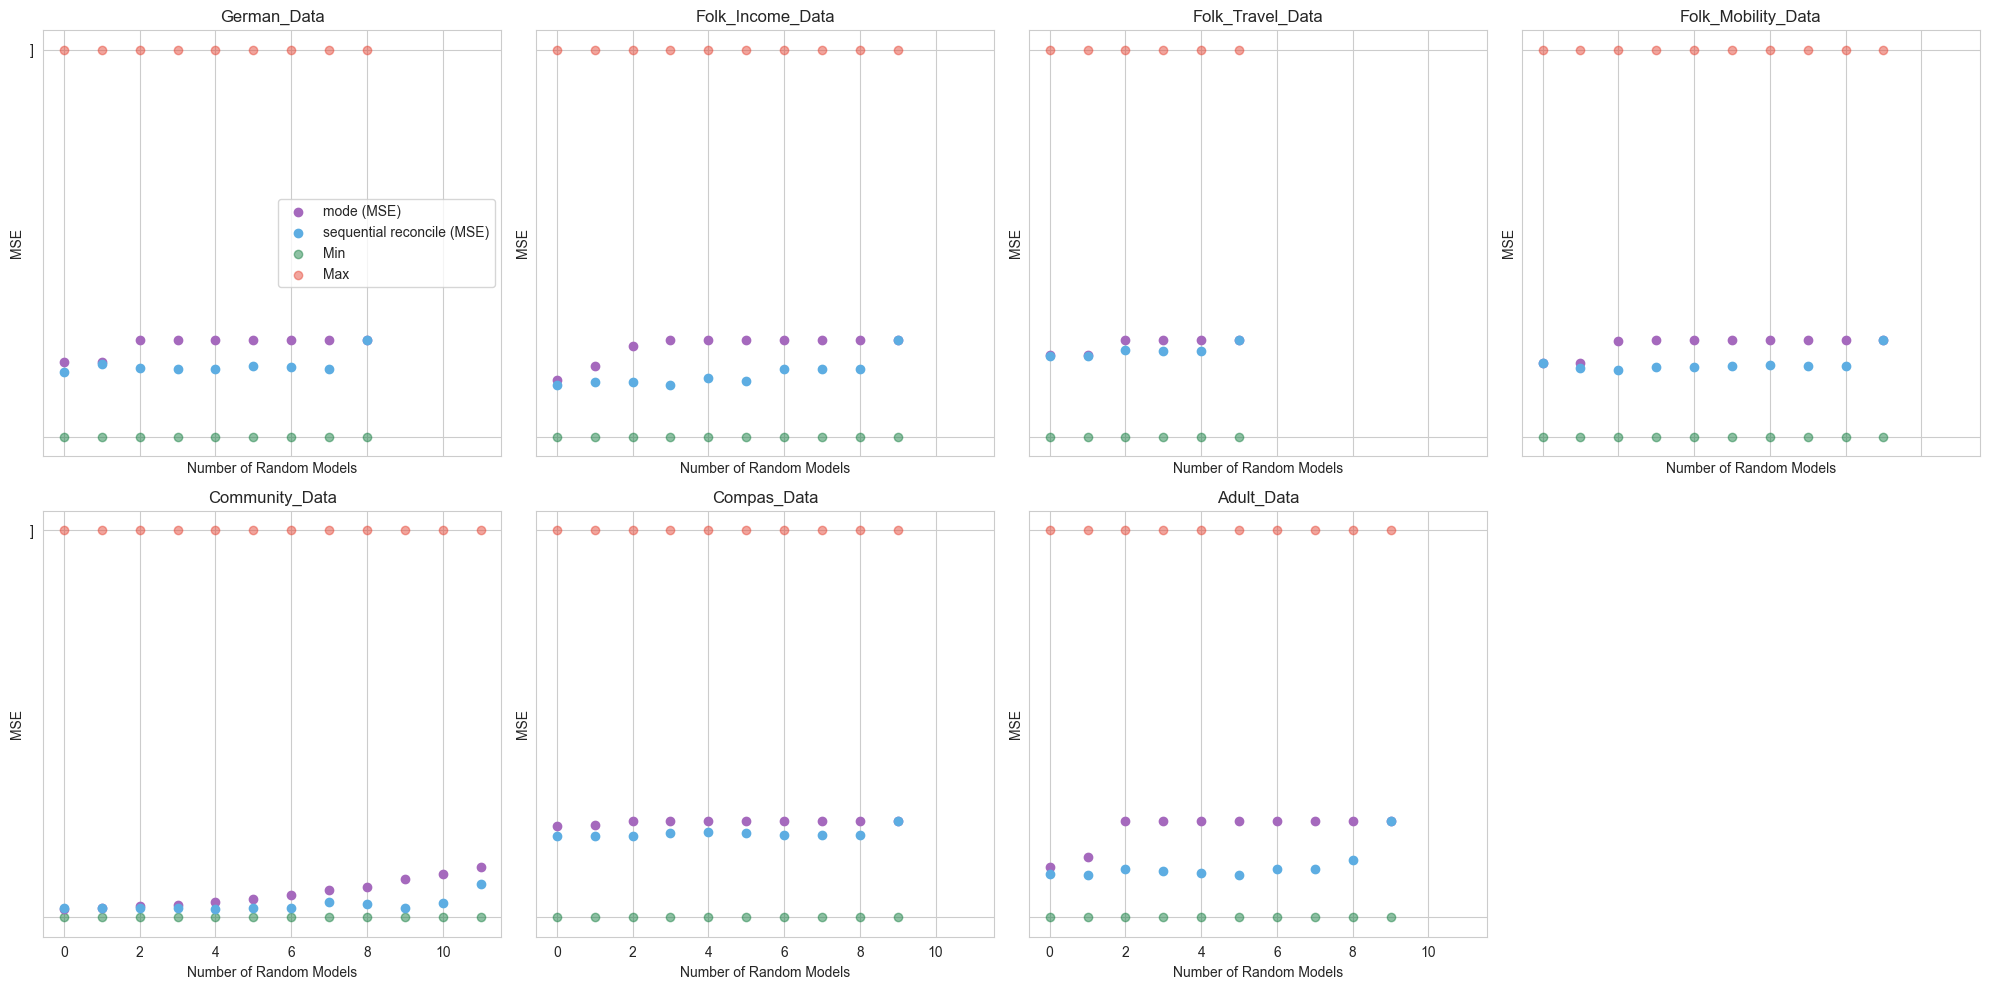

In [8]:
# Assume data preprocessing is already done
# data['Individual MSE'] = data['Individual MSE'].apply(ast.literal_eval)
data['Experiment'] = data.groupby(['Data', 'number of random models', 'Method']).cumcount() + 1
first_experiment_df = data[data['Experiment'] == 1]
filtered_df = first_experiment_df[~first_experiment_df['Method'].isin(['random_selection', 'randomized'])]

# Calculate min and max of individual MSE
min_max_df = (
    filtered_df.groupby(['Data', 'number of random models', 'Experiment'])['Individual MSE']
    .apply(lambda x: (min(x.iloc[0]), max(x.iloc[0])))  # Extract min and max from the first row in each group
    .reset_index(name='MinMax')
)
min_max_df[['MSE_min', 'MSE_max']] = pd.DataFrame(min_max_df['MinMax'].tolist(), index=min_max_df.index)
min_max_df = min_max_df.drop(columns='MinMax')

datasets = filtered_df['Data'].unique()
method_colors = {
    'mean': '#a569bd',
    'mode': '#a569bd',
    'sequential reconcile': '#5dade2',  # Add as needed for more methods
}

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the 2D array for easy iteration

# Iterate over datasets
for i, dataset in enumerate(datasets):
    ax = axes[i]
    dataset_data = filtered_df[filtered_df['Data'] == dataset]
    min_max_data = min_max_df[min_max_df['Data'] == dataset]
    
    for method in dataset_data['Method'].unique():
        method_data = dataset_data[dataset_data['Method'] == method]
        x = method_data['number of random models']
        y = method_data['MSE']
        
        # Scatter plot for MSE
        ax.scatter(x, y, label=f'{method} (MSE)', color=method_colors.get(method, 'gray'), zorder=5)
    
    # Plot Min and Max as points
    ax.scatter(min_max_data['number of random models'], min_max_data['MSE_min'], alpha=0.5, color='#1e8449', label='Min', zorder=3)
    ax.scatter(min_max_data['number of random models'], min_max_data['MSE_max'], alpha=0.5, color='#e74c3c', label='Max', zorder=3)
    
    ax.set_title(f'{dataset}')
    ax.set_xlabel('Number of Random Models')
    ax.set_ylabel('MSE')
    ax.grid(True)
    if i == 0:  # Add legend to the first subplot only
        ax.legend()

# Remove the unused last subplot
if len(datasets) < len(axes):
    fig.delaxes(axes[-1])

# Adjust layout and show the figure
plt.tight_layout()
plt.show()


In [10]:
min_max_data = min_max_df[['Data', 'number of random models', 'MSE_min', 'MSE_max']]
table_df = first_experiment_df.merge(min_max_data, on=['Data', 'number of random models'])

# Step 3: Select and reorder columns
table_df = table_df[['Data', 'number of random models', 'Method', 'MSE', 'MSE_min', 'MSE_max']]

# Step 4: Display the table
print(table_df)

            Data  number of random models                Method    MSE  \
0    German_Data                        0                  mode  0.192   
1    German_Data                        0            randomized  0.204   
2    German_Data                        0      random_selection  0.179   
3    German_Data                        0  sequential reconcile  0.168   
4    German_Data                        1                  mode  0.192   
..           ...                      ...                   ...    ...   
263   Adult_Data                        8  sequential reconcile  0.149   
264   Adult_Data                        9                  mode  0.250   
265   Adult_Data                        9            randomized  0.250   
266   Adult_Data                        9      random_selection  0.250   
267   Adult_Data                        9  sequential reconcile  0.250   

     MSE_min  MSE_max  
0     0.1641   0.2434  
1     0.1641   0.2434  
2     0.1641   0.2434  
3     0.1641   

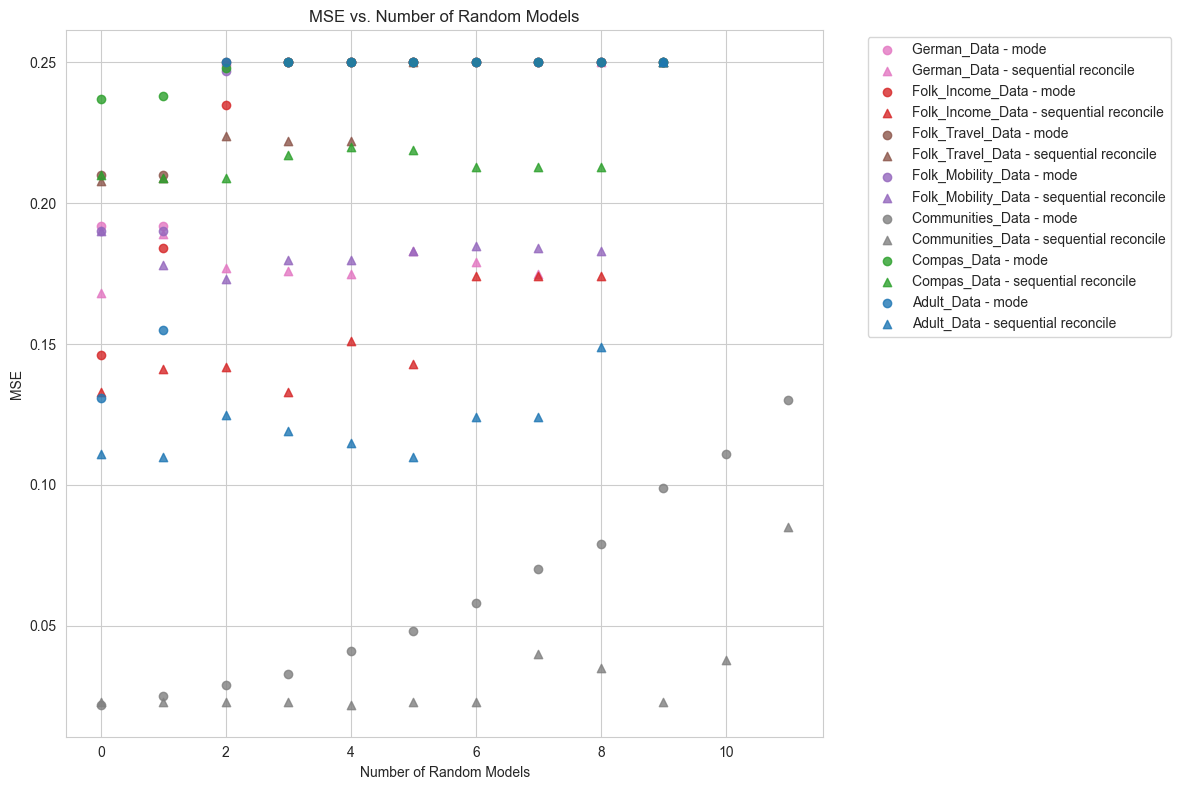

In [5]:
data['Experiment'] = data.groupby(['Data', 'number of random models', 'Method']).cumcount() + 1
first_experiment_df = data[data['Experiment'] == 1]
filtered_df = first_experiment_df[~first_experiment_df['Method'].isin(['random_selection', 'randomized'])]

# Define colors for datasets and shapes for methods
dataset_colors = {
    'Adult_Data': '#1f77b4',
    'Community_Data': '#ff7f0e',
    'Compas_Data': '#2ca02c',
    'Folk_Income_Data': '#d62728',
    'Folk_Mobility_Data': '#9467bd',
    'Folk_Travel_Data': '#8c564b',
    'German_Data': '#e377c2'
}

method_shapes = {
    'mean': 'o',
    'mode': 'o',  # Circle
    'sequential reconcile': '^'  # Triangle
}

# Create a single plot
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over datasets and methods
for dataset in filtered_df['Data'].unique():
    dataset_data = filtered_df[filtered_df['Data'] == dataset]
    color = dataset_colors.get(dataset, 'gray')  # Default to gray if dataset is not in the dictionary

    for method in dataset_data['Method'].unique():
        method_data = dataset_data[dataset_data['Method'] == method]
        x = method_data['number of random models']
        y = method_data['MSE']
        shape = method_shapes.get(method, 'x')  # Default to 'x' if method is not in the dictionary

        # Scatter plot for each dataset-method combination
        ax.scatter(x, y, label=f'{dataset} - {method}', color=color, marker=shape, alpha=0.8)

# Set plot labels, title, and grid
ax.set_xlabel('Number of Random Models')
ax.set_ylabel('MSE')
ax.set_title('MSE vs. Number of Random Models')
ax.grid(True)

# Remove duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

/var/folders/v_/d3hz__gx7y9ffy_rls7zbjpm0000gn/T/ipykernel_5744/4180190805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Dataset-Method'] = filtered_df['Data'] + '-' + filtered_df['Method']


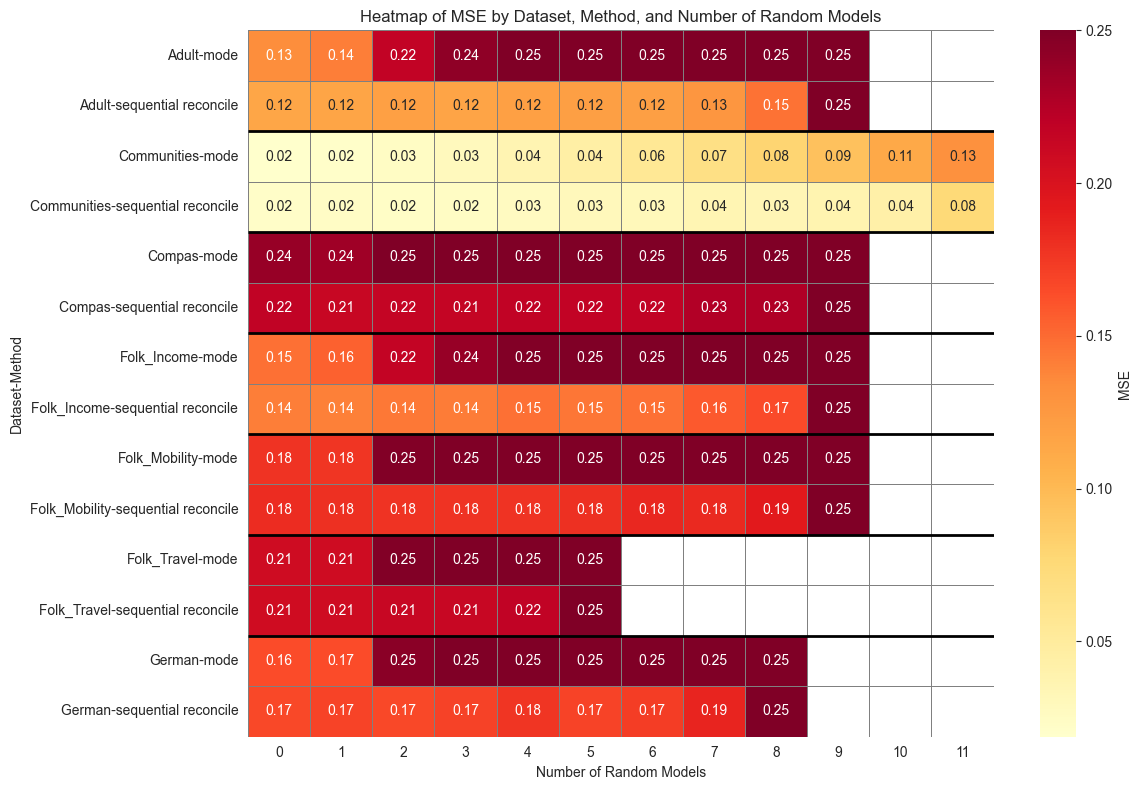

In [11]:
filtered_df['Dataset-Method'] = filtered_df['Data'] + '-' + filtered_df['Method']

# Pivot the data to create a matrix for the heatmap
heatmap_data = filtered_df.pivot_table(
    index='Dataset-Method',
    columns='number of random models',
    values='MSE',
    aggfunc='mean'
)

# Order rows to group by datasets
heatmap_data = heatmap_data.sort_index(key=lambda x: x.str.split('-').str[0])

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",  # Yellow to Red for meaningful shading (higher MSE = worse)
    annot=True,  # Annotate the MSE values on the heatmap
    fmt=".2f",  # Format for MSE values
    linewidths=0.5,  # Default thin lines
    linecolor="gray",  # Default line color
    cbar_kws={'label': 'MSE'}
)

# Add thicker horizontal lines between datasets
dataset_names = filtered_df['Data'].unique()
dataset_positions = [i for i, label in enumerate(heatmap_data.index) if any(name in label for name in dataset_names)]

# Draw thick lines selectively between datasets
for i in range(len(dataset_positions) - 1):
    if heatmap_data.index[dataset_positions[i]].split('-')[0] != heatmap_data.index[dataset_positions[i + 1]].split('-')[0]:
        ax.hlines(dataset_positions[i] + 1, *ax.get_xlim(), colors="black", linewidth=2)

# Set labels and title
ax.set_xlabel('Number of Random Models')
ax.set_ylabel('Dataset-Method')
ax.set_title('Heatmap of MSE by Dataset, Aggregation Method, and Number of Random Models')
ax.grid(False)
# Adjust layout and show the plot
plt.tight_layout()
plt.show()